### 1. Import the necessary libraries.

In [1]:
import imblearn
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import os
from math import ceil 

import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report,accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE



### 2. Load the we_fn_use_c_marketing_customer_value_analysis.csv into the variable customer_df

In [2]:
customer_df=pd.read_csv(r"C:\Users\Quaresma\Documents\IRONHACK\Labs\12 lab-cleaning-numerical-data\files_for_lab\we_fn_use_c_marketing_customer_value_analysis.csv")

### 3. First look at its main features (head, shape, info).

In [3]:
customer_df.head()
customer_df.shape
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

### 4. Rename the columns so they follow the PE8 (snake case) (lower_case_with_underscores)

In [4]:
col=[customer_df.columns[i].lower().replace(" ","_") for i in range(len(customer_df.columns))]
customer_df.columns=col
customer_df

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


### 5. Change effective to date column to datetime format.

In [5]:
customer_df['effective_to_date'] = pd.to_datetime(customer_df['effective_to_date'])

### 6. Create a new dataframe using only the numerical data called numerical_df. Use this for the following questions.

In [6]:
numerical_df= customer_df.select_dtypes(include=np.number)
numerical_df   

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764
9130,3096.511217,21604,79,14,28,0,1,379.200000
9131,8163.890428,0,85,9,37,3,2,790.784983
9132,7524.442436,21941,96,34,3,0,3,691.200000


### 7. Define a function that differentiates between continuous and discrete variables. Hint: The number of unique values might be useful. Store continuous data into a continuous_df variable and do the same for discrete_df

In [7]:
print(numerical_df['customer_lifetime_value'].nunique())
print(numerical_df['income'].nunique())
print(numerical_df['monthly_premium_auto'].nunique())
print(numerical_df['months_since_last_claim'].nunique())
print(numerical_df['months_since_policy_inception'].nunique())
print(numerical_df['number_of_open_complaints'].nunique())
print(numerical_df['number_of_policies'].nunique())
print(numerical_df['total_claim_amount'].nunique())

8041
5694
202
36
100
6
9
5106


In [8]:
def cont_dis(data_input):
    global continuous_df, discrete_df
    numerical_df= data_input.select_dtypes(include=np.number)
    continuous = []
    discrete = []
    for i in numerical_df.columns:
        if numerical_df[i].nunique() >= 500:
            continuous.append(i)
        else:
            discrete.append(i)

    continuous_df = pd.DataFrame(numerical_df[continuous])
    discrete_df = pd.DataFrame(numerical_df[discrete])

    return  continuous_df, discrete_df
    



In [9]:
cont_dis(customer_df)
continuous_df
discrete_df

,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,69,32,5,0,1
1,94,13,42,0,8
2,108,18,38,0,2
3,106,18,65,0,7
4,73,12,44,0,1
...,...,...,...,...,...
9129,73,18,89,0,2
9130,79,14,28,0,1
9131,85,9,37,3,2
9132,96,34,3,0,3


In [10]:
continuous_df

,customer_lifetime_value,income,total_claim_amount
0,2763.519279,56274,384.811147
1,6979.535903,0,1131.464935
2,12887.431650,48767,566.472247
3,7645.861827,0,529.881344
4,2813.692575,43836,138.130879
...,...,...,...
9129,23405.987980,71941,198.234764
9130,3096.511217,21604,379.200000
9131,8163.890428,0,790.784983
9132,7524.442436,21941,691.200000


### 8. Plot a correlation matrix, comment what you see.

In [11]:
def matrix(df):
    matrix = df.corr().round(2)
    mask = np.zeros_like(matrix)
    mask[np.triu_indices_from(mask)] = True # don't include if you think it will confuse the students right now
    fig, ax = plt.subplots(figsize=(10, 8))
    ax = sns.heatmap(matrix, mask=mask, annot=True)
    plt.show()
    

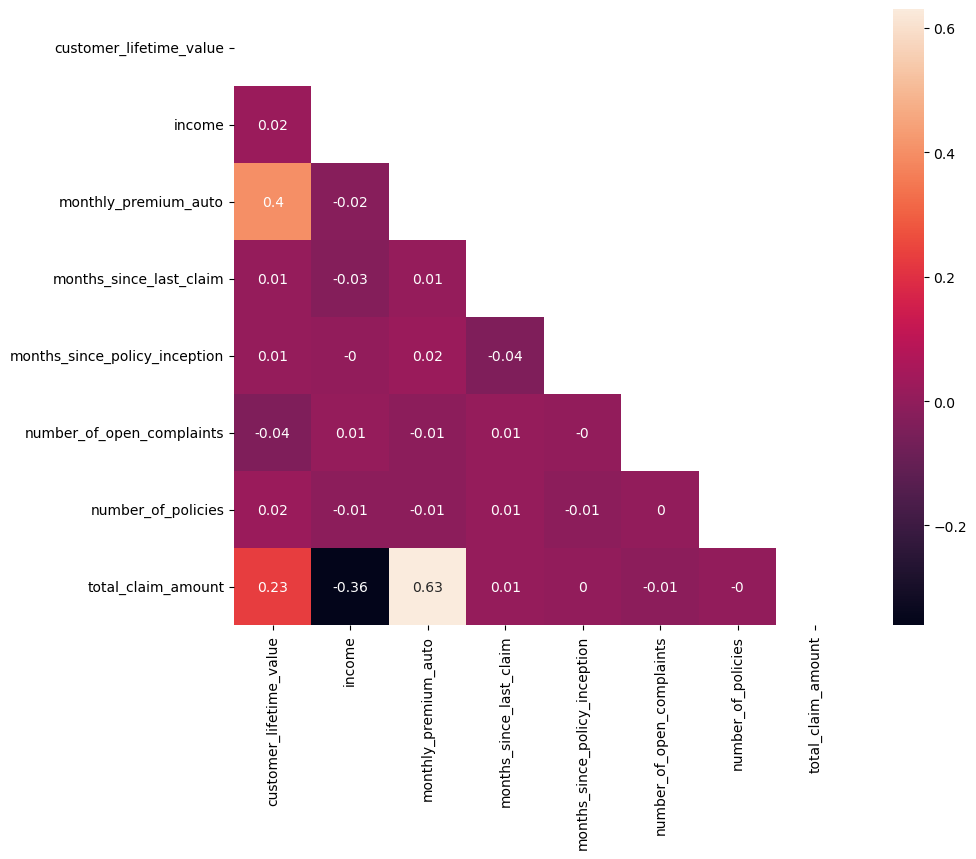

In [12]:
matrix(numerical_df)

### 9. Create a function to plot every discrete variable. Do the same with the continuous variables (Be Careful, you may need to change the plot type to one better suited for continuous data!)

In [13]:
def stacked_histplot(df):
    sns.set()

    fig, axes=plt.subplots(2, ceil(len(df.columns)/2),figsize=(20,11))

    for ax, feat in zip(axes.flatten(), df.columns): 
        ax.hist(df[feat])
        ax.set_title(feat, y=-0.14)
        
    title = "Discrete Variables"
    plt.suptitle(title)
    
    plt.show()



In [14]:
def stacked_distplot(df):
    sns.set()

    fig, axes=plt.subplots(2, ceil(len(df.columns)/2),figsize=(20,11))

    for ax, feat in zip(axes.flatten(), df.columns): 
        sns.distplot(df[feat], ax=ax)
        ax.set_title(feat, y=-0.14)
        
    title = "Continuos Variables"
    plt.suptitle(title)
    
    plt.show()

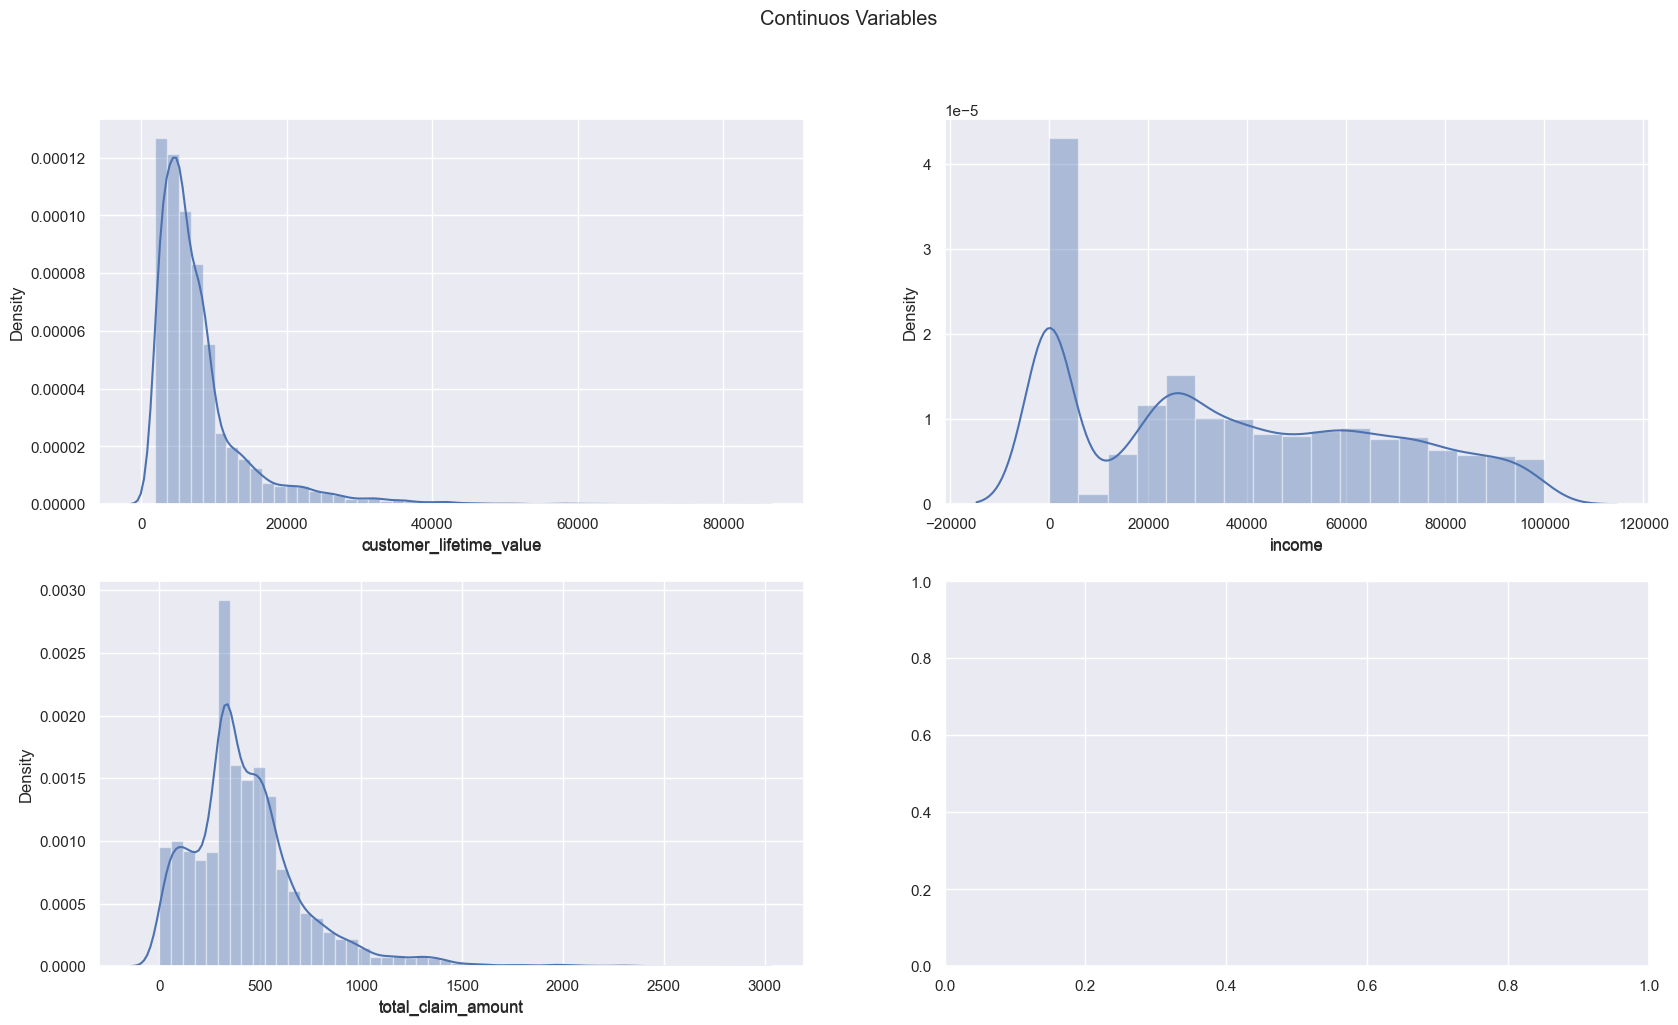

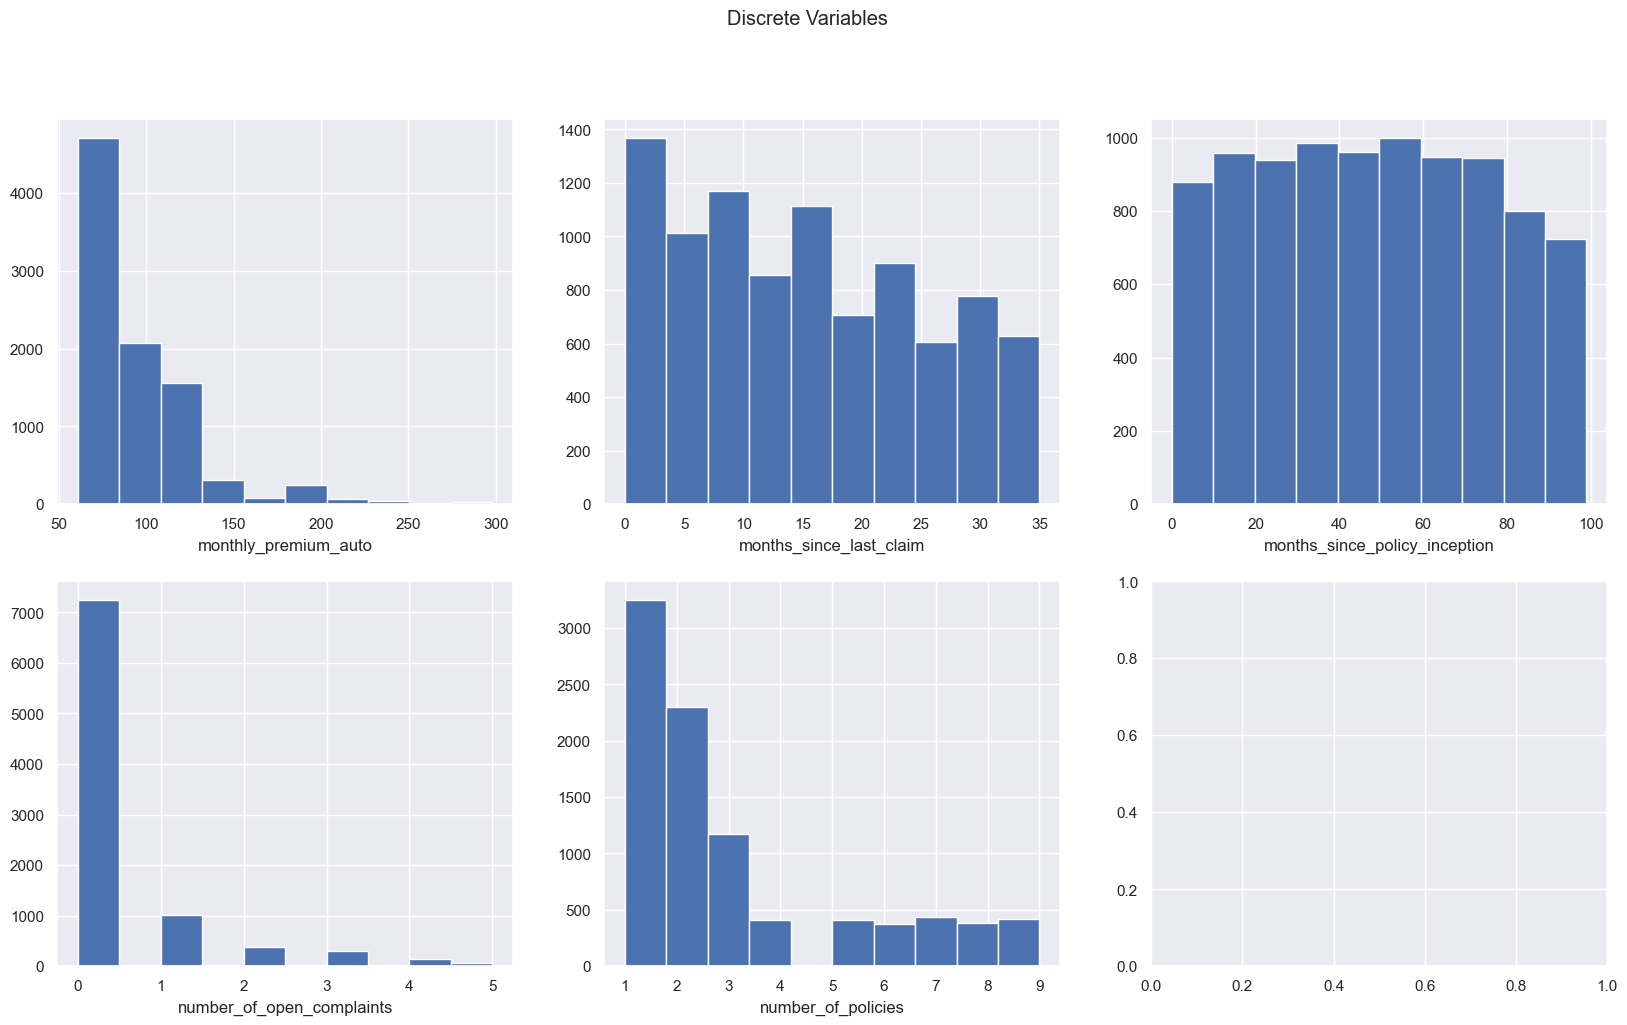

In [15]:
stacked_distplot(continuous_df)
stacked_histplot(discrete_df)

### 10. Comment what you can see in the plots.

### 11. Look for outliers in the continuous variables. (HINT: There’s a good plot to do that!)

In [16]:
def stacked_boxplot(df):
    sns.set()

    fig, axes=plt.subplots(2, ceil(len(df.columns)/2),figsize=(20,11))

    for ax, feat in zip(axes.flatten(), df.columns): 
        sns.boxplot(x=df[feat],ax=ax)

    plt.show()


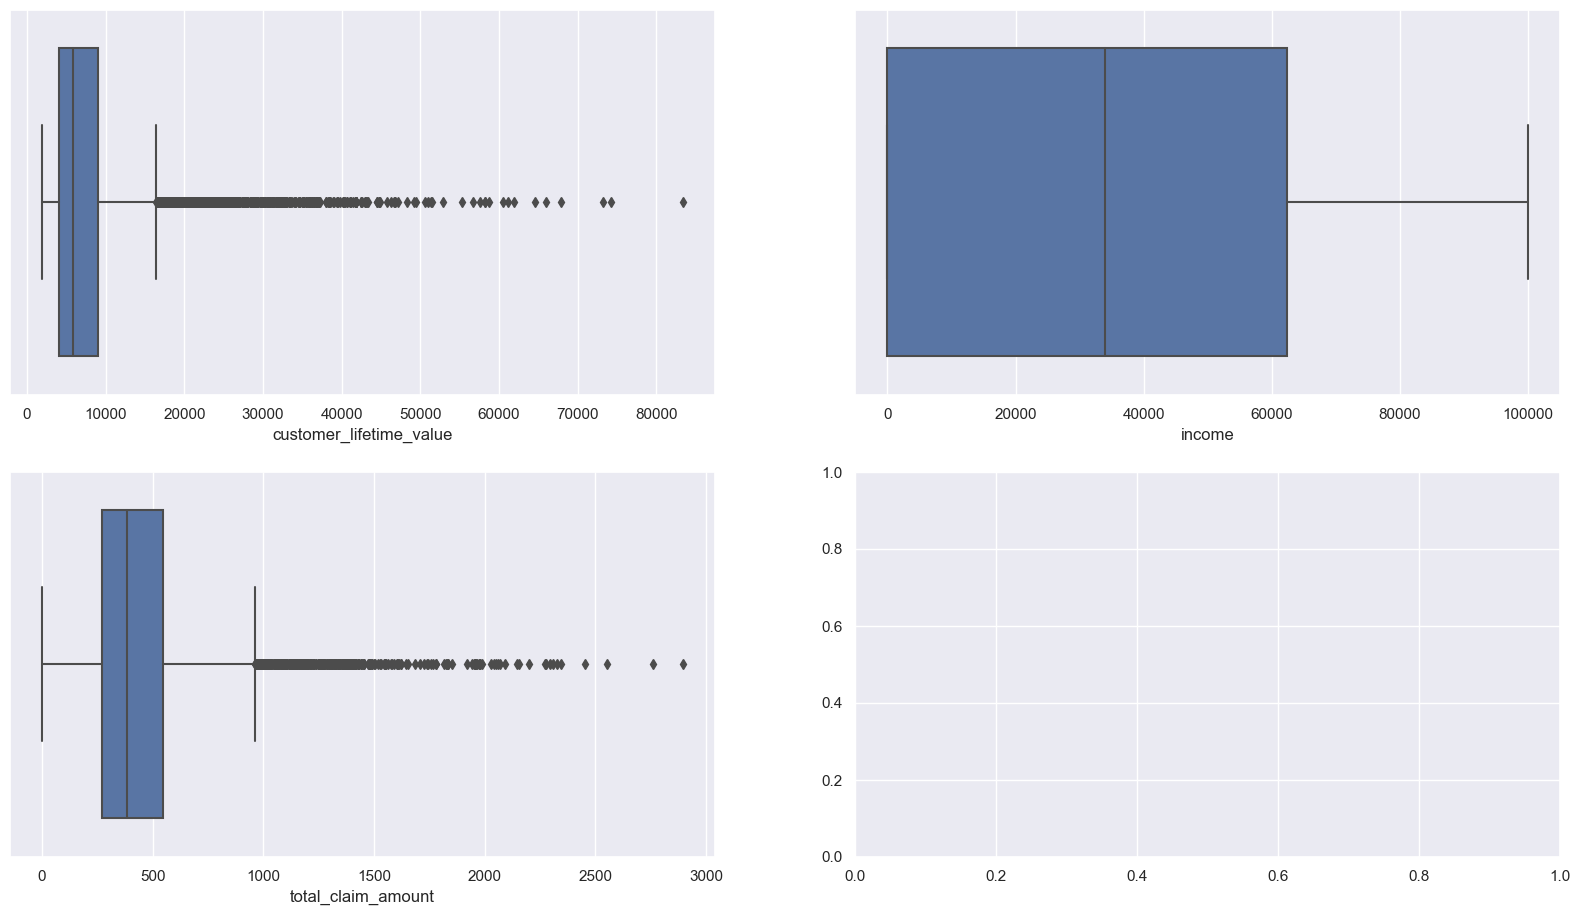

In [17]:
stacked_boxplot(continuous_df)

### 12. Did you find outliers? Comment what you will do with them. If you decide to remove them, do that now.

In [22]:
def outliers(df):
    global continuous_df_n_out
    q25 = df.quantile(.25)
    q75 = df.quantile(.75)
    iqr = (q75 - q25)

    upper_lim = q75 + 3 * iqr
    lower_lim = q25 - 3 * iqr

    filters2 = []
    for metric in df.columns:
        llim = lower_lim[metric]
        ulim = upper_lim[metric]
        filters2.append(df[metric].between(llim, ulim, inclusive=True))

    filters2 = pd.Series(np.all(filters2, 0))
    continuous_df_n_out = df[filters2]
    print('Percentage of data kept after removing outliers:', np.round(continuous_df_n_out.shape[0] / df.shape[0], 4))
    return continuous_df_n_out

outliers(continuous_df)

Percentage of data kept after removing outliers: 0.9485


,customer_lifetime_value,income,total_claim_amount
0,2763.519279,56274,384.811147
1,6979.535903,0,1131.464935
2,12887.431650,48767,566.472247
3,7645.861827,0,529.881344
4,2813.692575,43836,138.130879
...,...,...,...
9129,23405.987980,71941,198.234764
9130,3096.511217,21604,379.200000
9131,8163.890428,0,790.784983
9132,7524.442436,21941,691.200000


### 13. Check all columns for NaN values. Decide what (if anything) you will need to do with them, do that now.

In [ ]:
numerical_df.isnull().sum()
customer_df.isnull().sum()

### 14. Save the numerical_df to csv as numerical.csv You will use this file again this week.

In [ ]:
numerical_df.to_csv(r"C:\Users\Quaresma\Documents\IRONHACK\Labs\12 lab-cleaning-numerical-data\files_for_lab\numerical.csv")